# **Recomendation System - Collaborative Filtering**

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user.

# **Imports**

Import common libraries that will be used

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import tensorflow as tf
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate, Dropout
from keras.models import Model

warnings.filterwarnings('ignore')
%matplotlib inline

# **Upload Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path_to_course = '/content/drive/My Drive/dataset/dataset/course_with_id.csv'
path_to_user = '/content/drive/My Drive/dataset/dataset/users.csv'
path_to_rating = '/content/drive/My Drive/dataset/dataset/user_rating.csv'

# # Use local directory
# path_to_course = '/content/course_with_id.csv'
# path_to_user = '/content/users.csv'
# path_to_rating = '/content/user_rating.csv'

Mounted at /content/drive


# **Read Data**

## **Course**

In [ ]:
courses = pd.read_csv(path_to_course)
courses.head()

,id_kursus,judul,link,penyelenggara,kategori,instruktor,level,rating,biaya,deskripsi
0,1,Marketing Introduction,https://myskill.id/course/marketing-introduction,Myskill,Digital Marketing,Ryan Dwana,Beginner,4.66,Berbayar,Dalam materi ini kamu akan belajar secara dasa...
1,2,Branding Introduction,https://myskill.id/course/branding-introduction,Myskill,Digital Marketing,Ryan Dwana,Beginner,4.61,Berbayar,Dalam materi ini kamu akan mempelajari prinsip...
2,3,Brand Positioning Introduction,https://myskill.id/course/brand-positioning-in...,Myskill,Digital Marketing,Ryan Dwana,Beginner,4.60,Berbayar,"Dalam materi ini, kamu akan mempelajari konsep..."
3,4,Finding the Brand Benefit,https://myskill.id/course/finding-brand-benefit,Myskill,Digital Marketing,Ryan Dwana,Beginner,4.61,Berbayar,"Dalam materi kali ini, kamu akan mempelajari t..."
4,5,Consumer & Audience Insight,https://myskill.id/course/consumer-audience-in...,Myskill,Digital Marketing,Ryan Dwana,Beginner,4.60,Berbayar,"Materi kali ini akan membahas mengenai ""Creati..."


In [ ]:
courses.shape

(322, 10)

In [ ]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_kursus      322 non-null    int64  
 1   judul          322 non-null    object 
 2   link           322 non-null    object 
 3   penyelenggara  322 non-null    object 
 4   kategori       322 non-null    object 
 5   instruktor     226 non-null    object 
 6   level          163 non-null    object 
 7   rating         211 non-null    float64
 8   biaya          226 non-null    object 
 9   deskripsi      322 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 25.3+ KB


## **User Rating**

In [ ]:
user_ratings = pd.read_csv(path_to_rating)
user_ratings.head()

,id_user,id_kursus,user_rating
0,1,9,3
1,1,56,5
2,1,24,5
3,1,15,4
4,1,16,3


In [ ]:
user_ratings.shape

(4841, 3)

In [ ]:
user_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4841 entries, 0 to 4840
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id_user      4841 non-null   int64
 1   id_kursus    4841 non-null   int64
 2   user_rating  4841 non-null   int64
dtypes: int64(3)
memory usage: 113.6 KB


In [ ]:
print(user_ratings.id_user.unique())
print(user_ratings.id_kursus.unique())
user_ratings.isna().sum()

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 159 150 151 152 153 154 155 156 157 158 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

id_user        0
id_kursus      0
user_rating    0
dtype: int64

# **Split Data for Training 80% and for Test 20%**

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(user_ratings, test_size=0.2, random_state=42)
print(f"Shape of train data: {train.shape}")
print(f"Shape of test data: {test.shape}")

Shape of train data: (3872, 3)
Shape of test data: (969, 3)


In [ ]:
# Train data
train.head()

,id_user,id_kursus,user_rating
432,22,28,5
3427,172,272,4
289,15,46,5
3279,163,289,5
4116,210,308,4


In [ ]:
# Test data
test.head()

,id_user,id_kursus,user_rating
3200,159,282,5
2527,122,243,4
4102,209,309,4
1926,90,73,3
1536,73,132,3


# **Number Unique**

In [ ]:
# unique_users = train['id_user'].unique()
# print("Unique Users:", unique_users)
# print("Number of Unique Users:", len(unique_users))

# unique_courses = train['id_kursus'].unique()
# print("\nUnique Courses:", unique_courses)
# print("Number of Unique Courses:", len(unique_courses))


In [ ]:
max_user_id = train['id_user'].max()
max_course_id = train['id_kursus'].max()

print("Maximum User ID:", max_user_id)
print("Maximum Course ID:", max_course_id)

Maximum User ID: 259
Maximum Course ID: 322


# **Building the recommendation engine using TensorFlow / Keras**

In [ ]:
#course input network
input_course = tf.keras.layers.Input(shape=[1], name="Course-Input")
embed_course = tf.keras.layers.Embedding(max_course_id+1, 5)(input_course)
course_out = tf.keras.layers.Flatten()(embed_course)

#user input network
input_users = tf.keras.layers.Input(shape=[1])
embed_users = tf.keras.layers.Embedding(max_user_id+1, 5, name="User-Input")(input_users)
users_out = tf.keras.layers.Flatten()(embed_users)

conc_layer = tf.keras.layers.Concatenate()([course_out, users_out])
dropout_layer = tf.keras.layers.Dropout(0.2)(conc_layer)
x = tf.keras.layers.Dense(128, activation='relu')(dropout_layer)
x_out = tf.keras.layers.Dense(1, activation='relu')(x)
model = tf.keras.Model([input_course, input_users], x_out)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Course-Input (InputLayer)   [(None, 1)]                  0         []                            
                                                                                                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 1, 5)                 1615      ['Course-Input[0][0]']        
                                                                                                  
 User-Input (Embedding)      (None, 1, 5)                 1300      ['input_1[0][0]']             
                                                                                              

In [ ]:
history = model.fit([train.id_kursus, train.id_user], train.user_rating,
                      batch_size=64, # bisa juga pakai 128
                      epochs=5,
                      verbose=1,
                      validation_data=([test.id_kursus, test.id_user], test.user_rating))

Epoch 1/5
61/61 [==============================] - 1s 6ms/step - loss: 13.3340 - val_loss: 8.3886
Epoch 2/5
61/61 [==============================] - 0s 3ms/step - loss: 3.5743 - val_loss: 0.7613
Epoch 3/5
61/61 [==============================] - 0s 3ms/step - loss: 0.7889 - val_loss: 0.7094
Epoch 4/5
61/61 [==============================] - 0s 3ms/step - loss: 0.7115 - val_loss: 0.7171
Epoch 5/5
61/61 [==============================] - 0s 3ms/step - loss: 0.6913 - val_loss: 0.7253


# **Plot Metrics**


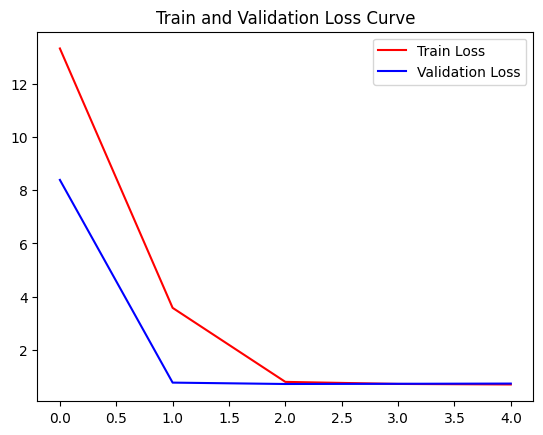

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, color='r', label='Train Loss')
plt.plot(val_loss, color='b', label='Validation Loss')
plt.title("Train and Validation Loss Curve")
plt.legend()
plt.show()

# **Check Loss**

In [ ]:
# Assuming you have test data: test.id_kursus, test.id_user, test.user_rating
loss = model.evaluate([test.id_kursus, test.id_user], test.user_rating)
print("Test Loss:", loss)

31/31 [==============================] - 0s 1ms/step - loss: 0.7253
Test Loss: 0.7252961993217468


In [ ]:
from sklearn.metrics import mean_absolute_error

# Make predictions on training and testing data
train_predictions = model.predict([train.id_kursus, train.id_user])
test_predictions = model.predict([test.id_kursus, test.id_user])

# Calculate evaluation metrics
train_mse = mean_squared_error(train.user_rating, train_predictions)
test_mse = mean_squared_error(test.user_rating, test_predictions)

print(f'Train MSE: {train_mse:.4f}')
print(f'Test MSE: {test_mse:.4f}')


31/31 [==============================] - 0s 1ms/step
Train MSE: 0.5828
Test MSE: 0.7253


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Step 1: Calculate the average score on the training data
mean_rating = train.user_rating.mean()

# Step 2: Basic model predictions
baseline_predictions = np.full_like(test.user_rating, mean_rating)

# Step 3: Evaluate with MSE or MAE
mse_model = mean_squared_error(test.user_rating, model.predict([test.id_kursus, test.id_user]))
mae_model = mean_absolute_error(test.user_rating, model.predict([test.id_kursus, test.id_user]))

mse_baseline = mean_squared_error(test.user_rating, baseline_predictions)
mae_baseline = mean_absolute_error(test.user_rating, baseline_predictions)

# Step 4: Comparison
print("Model Regression MSE:", mse_model)
print("Baseline Model MSE:", mse_baseline)

print("Model Regression MAE:", mae_model)
print("Baseline Model MAE:", mae_baseline)

31/31 [==============================] - 0s 1ms/step
Model Regression MSE: 0.7252962263110655
Baseline Model MSE: 0.673890608875129
Model Regression MAE: 0.7362790597358602
Baseline Model MAE: 0.673890608875129


# **Model Save**

In [ ]:
model.save('recommendation_rating_model.h5')
model.save('my_model.keras')

# **Making Recommendations for Users**

In [ ]:
#Making recommendations
c_id = range(1,322) # input course IDs
course_arr = np.array(c_id) #get all course IDs

In [ ]:
user_rec = 96 # input user id
user = np.array([user_rec for i in range(len(c_id))]) # check for user
pred = model.predict([course_arr, user])
pred

11/11 [==============================] - 0s 2ms/step


array([[4.0701265],
       [3.487537 ],
       [3.8401694],
       [3.9132636],
       [4.1144915],
       [3.6618433],
       [4.2316585],
       [4.18564  ],
       [4.066492 ],
       [4.2621465],
       [4.002214 ],
       [3.6425385],
       [3.879757 ],
       [3.96027  ],
       [3.723446 ],
       [4.1069484],
       [3.8442664],
       [4.045332 ],
       [3.6716666],
       [4.26002  ],
       [3.869582 ],
       [4.0019293],
       [3.980092 ],
       [4.1012545],
       [4.055795 ],
       [3.8046236],
       [3.9041944],
       [4.2589617],
       [4.2049203],
       [3.8139913],
       [3.831667 ],
       [4.026437 ],
       [4.088708 ],
       [3.962122 ],
       [4.1357884],
       [4.2613387],
       [4.1190686],
       [4.027224 ],
       [3.9137106],
       [3.9563098],
       [4.106709 ],
       [3.8243518],
       [4.2894483],
       [4.014516 ],
       [4.051858 ],
       [3.8024752],
       [3.8773541],
       [3.8286648],
       [4.016629 ],
       [3.7960162],


In [ ]:
pred = pred.reshape(-1) #reshape to single dimension
pred_ids = (-pred).argsort()[0:10] # predict 10 courses

In [ ]:
# print predicted scores
pred_ids

array([ 76, 310, 121, 294, 302, 314, 103, 318, 246, 226])

In [ ]:
courses.iloc[pred_ids]

,id_kursus,judul,link,penyelenggara,kategori,instruktor,level,rating,biaya,deskripsi
76,77,Data Analysis Fundamental,https://myskill.id/course/data-analysis-fundam...,Myskill,Data Science & Data Analysis,Rizki Teguh Kurniawan,NaN,4.65,Berbayar,"Data analysis menjadi primadona di masa kini, ..."
310,311,Basic Spanish 3: Gettingthere,https://www.edx.org/learn/spanish/universitat-...,Universitat Politècnica de València,Language,NaN,Introductory,NaN,NaN,"Presentations, English Language, Grammar, Voca..."
121,122,"Search, Match and Find All",https://myskill.id/course/search-match-and-fin...,Myskill,Data Science & Data Analysis,Muhammad Ihza Mahendra,NaN,4.52,Berbayar,"Materi ini berfokus pada search, match dan fin..."
294,295,Email marketing: diseño ygestión de campañas,https://www.edx.org/learn/digital-marketing/un...,Universidad Galileo,Communication,NaN,Introductory,NaN,NaN,"Digital Marketing, Email Marketing, Marketing,..."
302,303,Italian Language andCulture: Beginner(2023-2024),https://www.edx.org/learn/italian/wellesley-co...,Wellesley College,Language,NaN,Introductory,NaN,NaN,"Reading Comprehension, Mobile Devices, Pronunc..."
314,315,Upper-IntermediateEnglish: Business andTechnology,https://www.edx.org/learn/english/universitat-...,Universitat Politècnica de València,Language,NaN,Intermediate,NaN,NaN,"Reading Comprehension, English Language, Gramm..."
103,104,SQL Keyword,https://myskill.id/course/sql-keyword,Myskill,Data Science & Data Analysis,Kevin Adinata,NaN,4.34,Berbayar,"Melalui video ini, kamu akan belajar mengenai ..."
318,319,Mandarin Chinese forBusiness,https://www.edx.org/learn/mandarin-chinese/man...,MandarinX,Language,NaN,Intermediate,NaN,NaN,"Pronunciation, Mandarin Chinese, Negotiation"
246,247,VITARA - Compliance RiskManagement,https://www.edx.org/learn/economics/the-intern...,The International Monetary Fund,Economics & Finance,NaN,Introductory,NaN,NaN,None
226,227,Climate Change: FinancialRisks and Opportunities,https://www.edx.org/learn/climate-change/imper...,Imperial College Business SchoolImperial Colle...,Economics & Finance,NaN,Intermediate,NaN,NaN,"Finance, Financial Market, Risk Management, Ca..."
